This notebook allows to run [OpenNARS for Applications](https://github.com/opennars/OpenNARS-for-Applications) in Colab
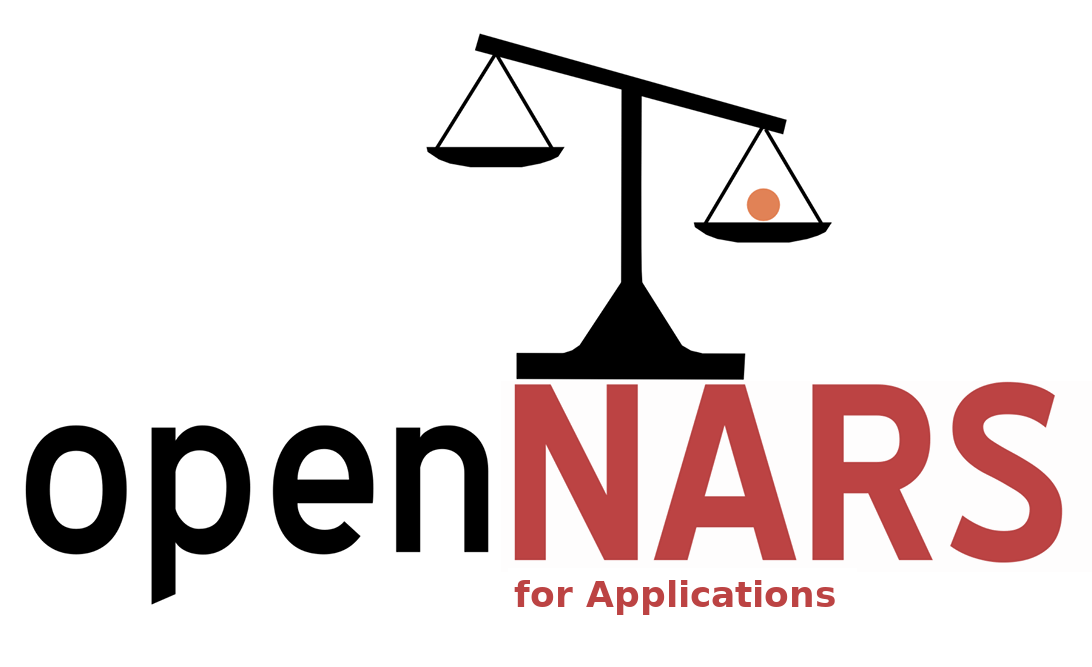

First, we install ONA:

In [1]:
!git clone https://github.com/opennars/OpenNARS-for-Applications
%cd OpenNARS-for-Applications
!./build.sh

Cloning into 'OpenNARS-for-Applications'...
remote: Enumerating objects: 8161, done.
remote: Counting objects: 100% (1742/1742), done.
remote: Compressing objects: 100% (507/507), done.
remote: Total 8161 (delta 1236), reused 1732 (delta 1229), pack-reused 6419
Receiving objects: 100% (8161/8161), 1.68 MiB | 2.61 MiB/s, done.
Resolving deltas: 100% (6103/6103), done.
/content/OpenNARS-for-Applications
rm: cannot remove 'NAR': No such file or directory
rm: cannot remove 'src/RuleTable.c': No such file or directory
src/Cycle.c src/Decision.c src/Event.c src/FIFO.c src/Globals.c src/HashTable.c src/Inference.c src/InvertedAtomIndex.c src/main.c src/Memory.c src/NAL.c src/NAR.c src/Narsese.c src/NetworkNAR/Metric.c src/NetworkNAR/UDP.c src/NetworkNAR/UDPNAR.c src/PriorityQueue.c src/Shell.c src/Stack.c src/Stamp.c src/Stats.c src/Table.c src/Term.c src/Truth.c src/Usage.c src/Variable.c
Compilation started:
src/NAL.c: In function ‘NAL_DerivedEvent’:
src/NAL.c:347:0: warning: ignoring #prag

Let's run the evaluation suite:

In [2]:
!python3 evaluation.py

<<NAR Follow test successful goods=506 bads=6 ratio=0.988281

System tests successful!

Now running Q&A experiments:

Passed ./examples/nal/pickbrighter.nal

Q&A metrics for test ./examples/nal/diagnostic.nal
Average answer time = 6.0
Average answer confidence = 0.341521
Combined loss = 3.950874

Q&A metrics for test ./examples/nal/prefernext.nal
Average answer time = 1.25
Average answer confidence = 0.38993249999999996
Combined loss = 0.762584375

Q&A stress test results for test ./examples/nal/example1.nal
Total questions = 20.0
Correctly answered ones = 20.0
Answer ratio = 1.0

Q&A metrics for test ./examples/nal/similarities.nal
Average answer time = 184.66666666666666
Average answer confidence = 0.26129933333333333
Combined loss = 136.41338977777778

Q&A metrics for test ./examples/nal/prefergeneral.nal
Average answer time = 1.3333333333333333
Average answer confidence = 0.5029766666666666
Combined loss = 0.6626977777777778

Q&A metrics for test ./examples/nal/circus.nal
Average a

We can also directly invoke the shell:

In [ ]:
!./NAR shell

a. :|:
Input: a. :|: occurrenceTime=1 Priority=1.000000 Truth: frequency=1.000000, confidence=0.900000
b. :|:
Input: b. :|: occurrenceTime=2 Priority=1.000000 Truth: frequency=1.000000, confidence=0.900000
Derived: dt=1.000000 <a =/> b>. Priority=0.320557 Truth: frequency=1.000000, confidence=0.282230
<?1 =/> b>?
Input: <?1 =/> b>?
Answer: <a =/> b>. creationTime=2 Truth: frequency=1.000000, confidence=0.282230
^C


or the Python interface:

In [ ]:
%cd ./misc/Python

/content/OpenNARS-for-Applications/misc/Python


In [ ]:
import NAR
NAR.AddInput("a. :|:")
NAR.AddInput("^left. :|:")
NAR.AddInput("g. :|:")
NAR.AddInput("a. :|:")
NAR.AddInput("g! :|:")["executions"]


Input: a. :|: occurrenceTime=1 Priority=1.000000 Truth: frequency=1.000000, confidence=0.900000
Input: ^left. :|: occurrenceTime=2 Priority=1.000000 Truth: frequency=1.000000, confidence=0.900000
Input: g. :|: occurrenceTime=3 Priority=1.000000 Truth: frequency=1.000000, confidence=0.900000
Derived: dt=1.000000 <(a &/ ^left) =/> g>. Priority=0.240110 Truth: frequency=1.000000, confidence=0.241351
Derived: dt=2.000000 <a =/> g>. Priority=0.313629 Truth: frequency=1.000000, confidence=0.254517
Input: a. :|: occurrenceTime=4 Priority=1.000000 Truth: frequency=1.000000, confidence=0.900000
Revised: a. Priority=1.000000 Truth: frequency=1.000000, confidence=0.642857
Derived: dt=1.000000 <g =/> a>. Priority=0.320557 Truth: frequency=1.000000, confidence=0.282230
Derived: dt=1.000000 <(a &/ g) =/> a>. Priority=0.234764 Truth: frequency=1.000000, confidence=0.213712
Derived: g. Priority=0.578773 Truth: frequency=0.983502, confidence=0.162922
Input: g! :|: occurrenceTime=5 Priority=1.000000 Tr

[{'arguments': [], 'operator': '^left'}]

In [ ]:
%cd ./../../

/content/OpenNARS-for-Applications


NLP interface:

In [ ]:
!python3 english_to_narsese.py quiet | ./NAR shell

*volume=0
Garfield is yellow
Comment: Input sentence: Garfield is yellow
Input: <{Garfield} --> [yellow]>. :|: occurrenceTime=1 Priority=1.000000 Truth: frequency=1.000000, confidence=0.900000
ducks are yellow
Comment: Input sentence: ducks are yellow
Input: <duck --> [yellow]>. :|: occurrenceTime=2 Priority=1.000000 Truth: frequency=1.000000, confidence=0.900000
Who is a duck?
Comment: Input sentence: Who is a duck?
Input: <?1 --> duck>? :|:
Answer: <{Garfield} --> duck>. :|: occurrenceTime=2 creationTime=2 Truth: frequency=1.000000, confidence=0.393204


*setopname 1 ^left

*setopname 2 ^right

*setopname 3 ^up

*setopname 4 ^down

*setopname 5 ^say

*setopname 6 ^pick

*setopname 7 ^drop

*setopname 8 ^go

*setopname 9 ^activate

*setopname 10 ^deactivate

//{i=0} <cat --> [green]>: { "priority": 0.810000, "usefulness": 0.999999, "useCount": 1000002, "lastUsed": 3, "frequency": 1.000000, "confidence": 0.900000, "termlinks": ["cat", "[green]", "", "", "green", ""]}

<cat --> [green]>. {1.000000 0.900000}

//{i=1} <{Garfield} --> cat>: { "priority": 0.900000, "usefulness": 0.999999, "useCount": 1000001, "lastUsed": 3, "frequency": 1.000000, "confidence": 0.900000, "termlinks": ["{Garfield}", "cat", "Garfield", "", "", ""]}

<{Garfield} --> cat>. {1.000000 0.900000}

//{i=2} <{Garfield} --> [green]>: { "priority": 0.244350, "usefulness": 0.666667, "useCount": 2, "lastUsed": 3, "frequency": 1.000000, "confidence": 0.810000, "termlinks": ["{Garfield}", "[green]", "Garfield", "", "green", ""]}

<{Garfield} --> [green]>. {1.000000 0.810000}


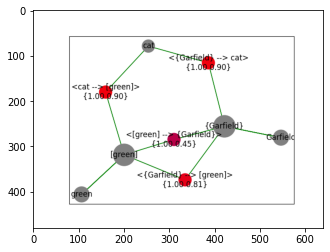

In [ ]:
narsese = """
<cat --> [green]>.
<{Garfield} --> cat>.
"""
with open('test.nal', 'w') as f:
    f.write(narsese)
!./NAR shell InspectionOnExit < test.nal | python3 concept_usefulness_filter.py 10 | python3 concepts_to_graph.py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('memory.png')
imgplot = plt.imshow(img)
plt.show()

Running a basic Transbot robot simulation:

In [3]:
%cd ./misc/Transbot

/content/OpenNARS-for-Applications/misc/Transbot


In [ ]:
!python3 transbot_simulation.py

















Comment: Avoid faced obstacle (due to innate collision pain to avoid, this can also be learned):
Input: dt=0.000000 <(<obstacle --> [left]> &/ ^right) =/> <obstacle --> [free]>>. Priority=1.000000 Truth: frequency=1.000000, confidence=0.900000
Input: dt=0.000000 <(<obstacle --> [right]> &/ ^left) =/> <obstacle --> [free]>>. Priority=1.000000 Truth: frequency=1.000000, confidence=0.900000
Input: dt=0.000000 <(<obstacle --> [front]> &/ ^left) =/> <obstacle --> [free]>>. Priority=1.000000 Truth: frequency=1.000000, confidence=0.900000
Input: dt=0.000000 <((<gripper --> [open]> &/ <obstacle --> [free]>) &/ ^forward) =/> G>. Priority=1.000000 Truth: frequency=1.000000, confidence=0.900000
Comment: Go to the location in order to see the object:
Input: dt=0.000000 <(<gripper --> [holding]> &/ <({SELF} * $1) --> ^goto>) =/> <$1 --> [left]>>. Priority=1.000000 Truth: frequency=1.000000, confidence=0.900000
Comment: If gripper is open and a bottle is seen, pick it up to hold it
I